对一周不同时段（工作日、节假日和双休日）的骑车人数进行聚类分析

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## 获取数据

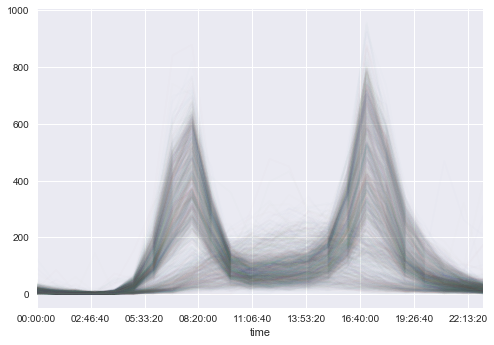

In [2]:
from jupyterworkflow.data import get_fremont_data

data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## 主成分分析

In [3]:
X = pivoted.fillna(0).T.values
X.shape

(1610, 24)

In [4]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [5]:
X2.shape

(1610, 2)

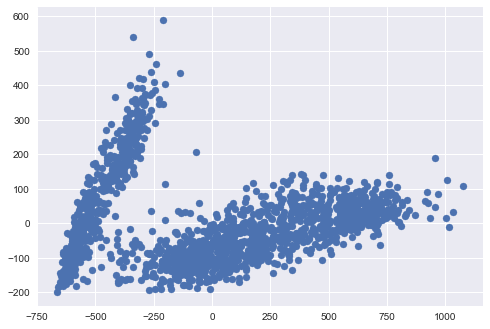

In [6]:
plt.scatter(X2[:, 0], X2[:, 1]);

## 无监督分类

In [7]:
gmm = GaussianMixture(2).fit(X)

labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

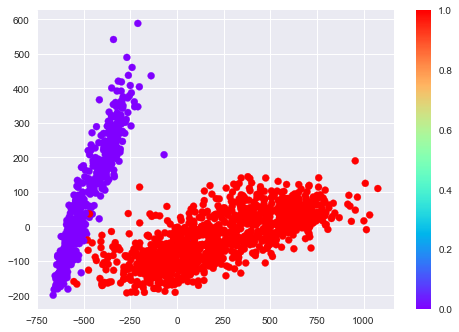

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow');
plt.colorbar();

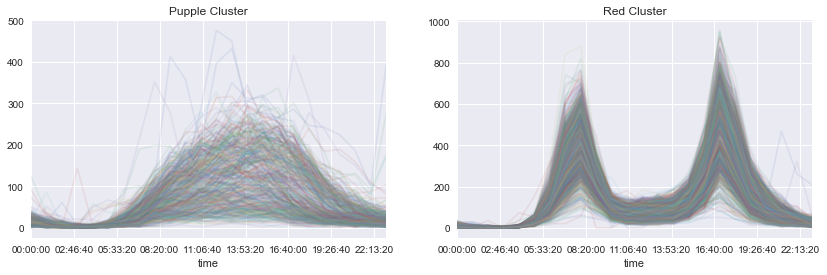

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Pupple Cluster')
ax[1].set_title('Red Cluster');

## 工作日 VS 节假日

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
dayofweek

array([2, 3, 4, ..., 6, 0, 1])

下图是双休日与节假日的自行车车数

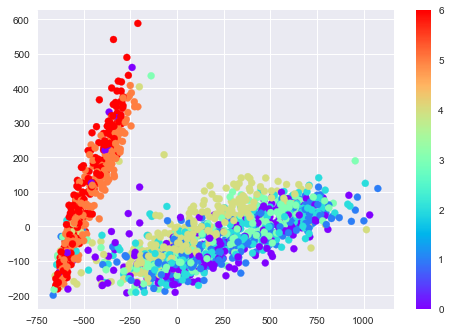

In [11]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow');
plt.colorbar();

## 异常值分析

In [1]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==1) & (dayofweek<5)]

NameError: name 'pd' is not defined

2017-02-06的寒流：[http://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/](http://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)